<a href="https://colab.research.google.com/github/RenanNB360/Transformers-Pipeline/blob/main/Zero_Shot_Transformers_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-12-19 22:28:09--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.1s    

2023-12-19 22:28:09 (49.5 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
!pip install transformers

In [3]:
from transformers import pipeline

In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import textwrap

In [5]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [6]:
classifier = pipeline('zero-shot-classification', device= 0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [7]:
classifier('this is a great movie', candidate_labels=['positive', 'negative'])

{'sequence': 'this is a great movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9962115287780762, 0.0037884798366576433]}

In [8]:
text = 'Due to the presence of isoforms of its components, there are 12 ' + \
    'versions of AMPK in mammals, each of which can haave different tissue ' + \
    'localizations, and different functions under different conditions. ' + \
    'AMPK is regulated allosterically and by post-translational ' + \
    'sodification, which work together.'
classifier(text, candidate_labels=['biology', 'math', 'geology'])

{'sequence': 'Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can haave different tissue localizations, and different functions under different conditions. AMPK is regulated allosterically and by post-translational sodification, which work together.',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.8853005170822144, 0.07019297778606415, 0.044506486505270004]}

In [9]:
df = pd.read_csv('bbc_text_cls.csv')

In [10]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [11]:
len(df)

2225

In [12]:
df.sample(frac=1).head()

,text,labels
1808,Philippoussis doubt over Open bid\n\nMark Phil...,sport
2074,Video phone help for deaf people\n\nDeaf peopl...,tech
547,Stars gear up for Bafta ceremony\n\nFilm stars...,entertainment
84,Home loan approvals rising again\n\nThe number...,business
1539,Wenger keeping faith with Almunia\n\nArsene We...,sport


In [13]:
labels = list(set(df['labels']))
labels

['entertainment', 'tech', 'politics', 'business', 'sport']

In [15]:
print(textwrap.fill(df.iloc[1024]['text']))

UK troops on Ivory Coast standby  Downing Street has confirmed British
troops are on standby in case they need to help evacuate several
hundred UK citizens from Ivory Coast.  The news came as it emerged
France had begun evacuating its hostages after days of anti-French
demonstrations. Trouble flared after nine French peacekeepers were
killed and President Jacques Chirac ordered the destruction of the
Ivory Coast's air force. A company of 100-120 UK troops is understood
to have been put on standby. They are ready to fly out and secure the
route from the embassy to the airport if called upon. Prime Minister
Tony Blair's official spokesman said: "There are British nationals in
Ivory Coast and as you can imagine we are making the usual contingency
plans in case the situation deteriorates further, but that's all I can
say at this stage."  He added the situation would be monitored
carefully in case evacuation became necessary. France has played a
lead role in international peacekeeping in Iv

In [16]:
df.iloc[1024]['labels']

'politics'

In [17]:
classifier(df.iloc[1024]['text'], candidate_labels = labels)

{'sequence': 'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in internati

In [18]:
preds = classifier(df['text'].tolist(), candidate_labels = labels)

In [30]:
preds[:2]

[{'sequence': 'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and w

In [20]:
predicted_labels = [d['labels'][0] for d in preds]

In [21]:
df['predicted_labels'] = predicted_labels

In [23]:
print(f"Acc: {np.mean(df['predicted_labels'] == df['labels'])}")

Acc: 0.5649438202247191


In [24]:
N = len(df)
K = len(labels)
label2idx = {v:k for k, v in enumerate(labels)}
probs = np.zeros((N, K))
for i in range(N):
  d = preds[i]
  for label, score in zip(d['labels'], d['scores']):
    k = label2idx[label]
    probs[i, k] = score

In [25]:
int_labels = [label2idx[x] for x in df['labels']]

In [26]:
int_preds = np.argmax(probs, axis = 1)
cm = confusion_matrix(int_labels, int_preds, normalize = 'true')

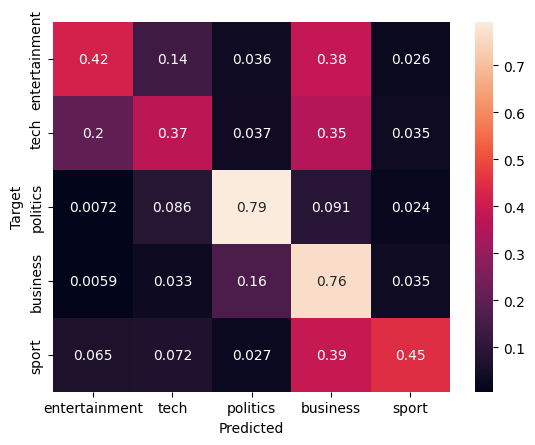

In [27]:
def plot_cm(cm):
  df_cm = pd.DataFrame(cm, index = labels, columns = labels)
  ax = sn.heatmap(df_cm, annot  = True, fmt = '.2g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Target')

plot_cm(cm)

In [28]:
f1_score(df['labels'], predicted_labels, average = 'micro')

0.5649438202247191

In [29]:
roc_auc_score(int_labels, probs, multi_class = 'ovo')

0.8853266860793887